Jesus Sierralaya

In [1]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Example 0: Random

## Data

In [2]:
# random is a function, doing random sampling in numpy.
X = np.random.randint(10, size=(100,3))
Y = np.where(X[:,0] < 5, 0, 1)

## Reshape

In [3]:
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Splitting data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model and training

In [4]:
# Defining the LSTM model
model = Sequential([
    LSTM(5, activation='relu', input_shape=(1, 3)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=0)

## Evaluating the model

In [5]:
# Evaluating the model
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Test Loss: 0.2952605187892914, Test Accuracy: 0.8999999761581421


## Plot: actual vs predicted values

1/1 [==============================] - 0s 86ms/step


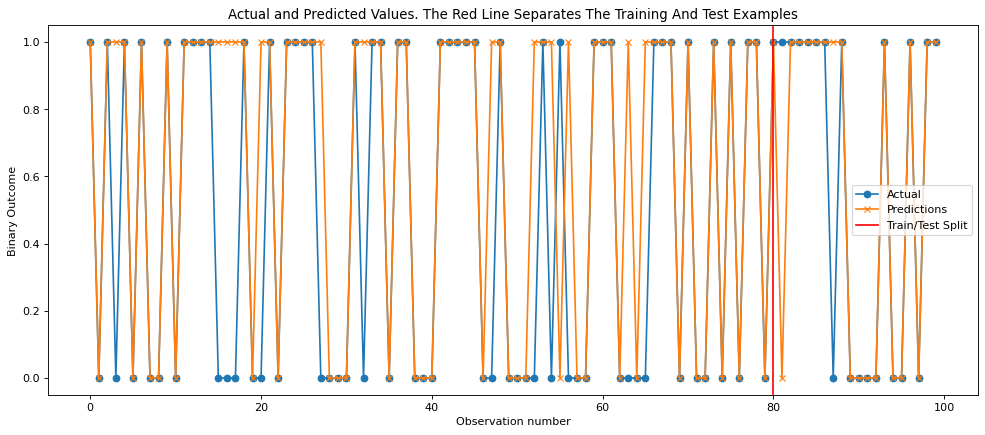

In [6]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict.round(), test_predict.round())  # Using round() to classify as 0 or 1
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual, 'o-', label='Actual')
    plt.plot(range(rows), predictions, 'x-', label='Predictions')
    plt.axvline(x=len(trainY), color='r', label='Train/Test Split')
    plt.legend()
    plt.xlabel('Observation number')
    plt.ylabel('Binary Outcome')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
    plt.show()

plot_result(trainY, testY, train_predict, test_predict)

Despite the random nature of the dataset, the model achieved a high accuracy of 90%. This might seem surprisingly good but considering the binary nature of the task and the random generation of the dataset, it's possible that some patterns could be accidentally learned by the model, or the model might be capitalizing on any slight imbalance in the distribution of the binary target. The relatively moderate loss suggests that there are still misclassifications, as expected from the randomness.

# Example 1: Linear Related

## Data

In [7]:
# Generating linearly related features with noise
time_series = np.arange(0, 100) + np.random.normal(0, 1, 100) * 2.5
feature_2 = time_series * np.random.normal(1.0, 0.2, 100) + np.random.normal(0, 5, 100)
feature_3 = time_series * np.random.normal(0.5, 0.1, 100) + np.random.normal(0, 10, 100)
X = np.vstack([time_series, feature_2, feature_3]).T
Y = np.where(X[:, 0] + X[:, 1] - X[:, 2] > np.median(X[:, 0] + X[:, 1] - X[:, 2]), 1, 0)

## Reshape

In [8]:
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Splitting data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model and training

In [9]:
# Defining the LSTM model
model = Sequential([
    LSTM(5, activation='relu', input_shape=(1, 3)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=0)

## Evaluating the model

In [10]:
# Evaluating the model
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Test Loss: 0.7193142175674438, Test Accuracy: 0.699999988079071


## Plot: actual vs predicted values

1/1 [==============================] - 0s 20ms/step


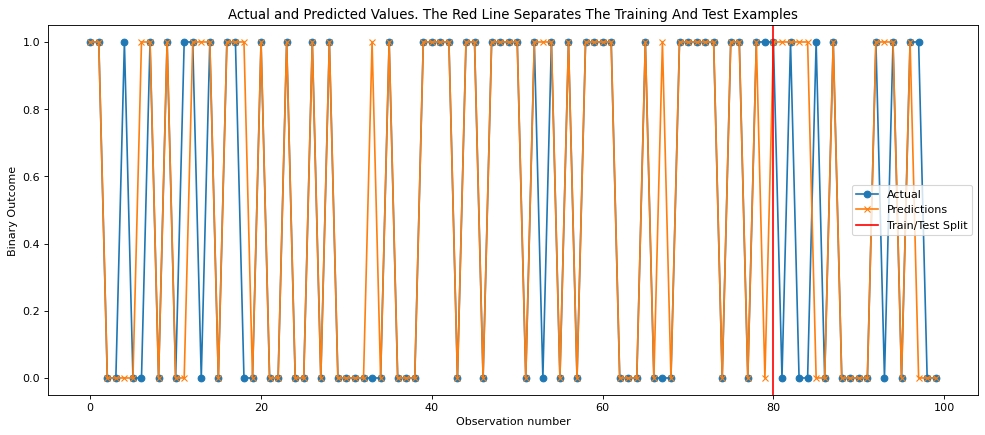

In [11]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict.round(), test_predict.round())  # Using round() to classify as 0 or 1
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual, 'o-', label='Actual')
    plt.plot(range(rows), predictions, 'x-', label='Predictions')
    plt.axvline(x=len(trainY), color='r', label='Train/Test Split')
    plt.legend()
    plt.xlabel('Observation number')
    plt.ylabel('Binary Outcome')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
    plt.show()

plot_result(trainY, testY, train_predict, test_predict)

This model, applied to data with linear relationships among the features, shows a lower accuracy compared to the random dataset. The increased loss indicates that the model struggled more with this dataset. This might suggest that while there are linear relationships among the features, the way the target variable was defined (based on a combination of features) introduced complexity that was more challenging for the model to learn, especially if the linear model assumptions do not hold perfectly.

# Example 2: Temporaly Dependent

## Data

In [12]:
# Generating temporally dependent features
time_steps = 100
X = np.zeros((time_steps, 3))
for t in range(1, time_steps):
    X[t, 0] = np.sin(0.1 * t) + np.random.normal(0, 0.1)
    X[t, 1] = X[t - 1, 0] * 0.5 + np.random.normal(0, 0.1)
    X[t, 2] = np.cos(0.1 * t) + np.random.normal(0, 0.1)
Y = np.where(X[:, 0] < 0, 0, 1)

## Reshape

In [13]:
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Splitting data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model and training

In [14]:
# Defining the LSTM model
model = Sequential([
    LSTM(5, activation='relu', input_shape=(1, 3)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=0)

## Evaluating the model

In [15]:
# Evaluating the model
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Test Loss: 0.13451574742794037, Test Accuracy: 1.0


## Plot: actual vs predicted values

1/1 [==============================] - 0s 19ms/step


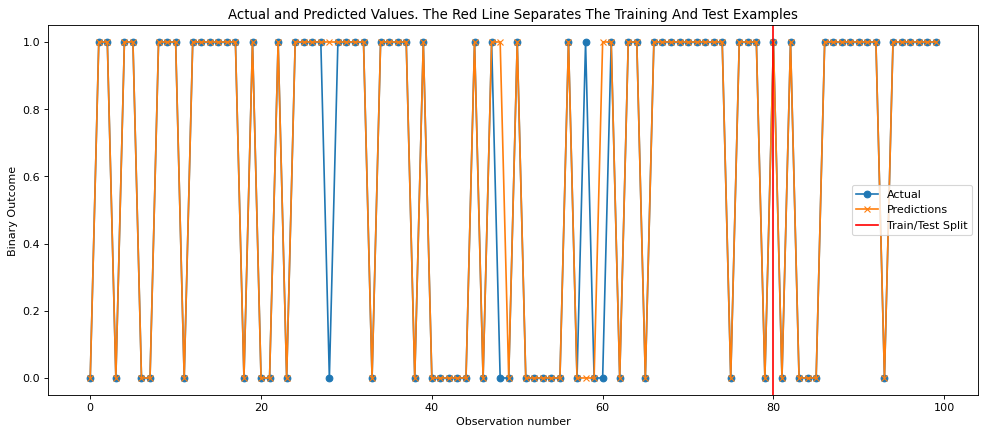

In [16]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict.round(), test_predict.round())  # Using round() to classify as 0 or 1
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual, 'o-', label='Actual')
    plt.plot(range(rows), predictions, 'x-', label='Predictions')
    plt.axvline(x=len(trainY), color='r', label='Train/Test Split')
    plt.legend()
    plt.xlabel('Observation number')
    plt.ylabel('Binary Outcome')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
    plt.show()

plot_result(trainY, testY, train_predict, test_predict)

The model trained on temporally dependent features performed exceptionally well, achieving perfect accuracy on the test set and the lowest loss among the three models. This suggests that the temporal dependencies within the features were significant and consistent enough for the LSTM model to learn effectively. The LSTM's ability to capture temporal sequences and dependencies likely contributed to its success on this dataset.

# Conclusion

The evaluation of the three models reveals key insights into how well LSTM networks can adapt to different data complexities. Model 0's high accuracy on random data suggests that LSTMs can find patterns even in noise, highlighting the need for careful data examination to avoid overfitting. Model 1's lower performance on linearly related data indicates challenges in capturing more subtle, structured relationships. In contrast, Model 2's perfect accuracy with temporally dependent features showcases LSTM's strength in leveraging temporal sequences for prediction. This underscores the critical need to match the model's capabilities with the data's inherent characteristics, emphasizing the model's adaptability to temporal dependencies as a crucial factor for success in time series forecasting tasks.